# 1. Introducción

### Breve introducción del problema
La duración de la estancia hospitalaria es un indicador clave en la gestión de los servicios de salud, ya que influye en la eficiencia de los recursos, los costos médicos y la calidad de la atención brindada a los pacientes. Predecir con anticipación el tiempo que un paciente permanecerá en el hospital permite mejorar la planificación de camas, optimizar el uso de personal médico y reducir gastos innecesarios. El problema central de esta investigación consiste en identificar qué características de los pacientes influyen más en la duración de su hospitalización y desarrollar modelos predictivos que ayuden en la toma de decisiones.

### Contexto
En el ámbito hospitalario, la estancia prolongada de un paciente puede deberse a múltiples factores, como la edad, el diagnóstico, las comorbilidades, los procedimientos médicos realizados y el nivel de gravedad de la enfermedad. Al mismo tiempo, una estancia demasiado corta puede implicar altas tasas de readmisión. Por lo tanto, comprender y predecir la duración de la hospitalización se ha convertido en un objetivo prioritario tanto para los profesionales de la salud como para los gestores de hospitales, ya que contribuye a equilibrar la calidad asistencial con la eficiencia operativa.

### Relación entre el problema y la base de datos seleccionada
La base de datos **Length of Stay (Microsoft) disponible en Kaggle** proporciona información detallada sobre miles de pacientes hospitalizados, incluyendo variables demográficas, diagnósticos, procedimientos y características clínicas. Estos datos permiten analizar cómo influyen dichos factores en el tiempo de hospitalización de cada paciente. Así, este conjunto de datos resulta adecuado para entrenar y evaluar modelos predictivos que estimen la duración de la estancia hospitalaria, ofreciendo un marco empírico sólido para abordar la pregunta de investigación planteada.




# 2. Descripción de la base de datos

In [2]:
# Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo general
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Datos
# Crear dataset
df = pd.read_csv("../datos/LengthOfStay.csv", sep=",")
# Mostrar las primeras filas del DataFrame
df.head()


,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5+,F,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,8/9/2012,0,F,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4


<Figure size 1200x600 with 0 Axes>

In [3]:

print("-------------- Numeros de muestras y variables --------------")
print(f"Número de muestras: {df.shape[0]}")
print(f"Número de variables: {df.shape[1]}")
dftypes = df.dtypes
print("-------------- Tipos de variables --------------")
print(f"Tipos de variables: \n{dftypes}")
print(f"Numero de variables por tipo: \n{dftypes.value_counts()}")

-------------- Numeros de muestras y variables --------------
Número de muestras: 100000
Número de variables: 28
-------------- Tipos de variables --------------
Tipos de variables: 
eid                             int64
vdate                          object
rcount                         object
gender                         object
dialysisrenalendstage           int64
asthma                          int64
irondef                         int64
pneum                           int64
substancedependence             int64
psychologicaldisordermajor      int64
depress                         int64
psychother                      int64
fibrosisandother                int64
malnutrition                    int64
hemo                            int64
hematocrit                    float64
neutrophils                   float64
sodium                        float64
glucose                       float64
bloodureanitro                float64
creatinine                    float64
bmi                

In [4]:
# Clasificación de variables
categoricas = df.select_dtypes(include=['object']).columns.tolist()
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Variables categóricas:")
print("\n".join([f"- {col}" for col in categoricas]))

print("\nVariables numéricas:")
print("\n".join([f"- {col}" for col in numericas]))

# Identificación de variables binarias (0/1) entre las numéricas
binarias = []
for col in numericas:
    valores_unicos = df[col].dropna().unique()
    if set(valores_unicos).issubset({0, 1}):
        binarias.append(col)

if binarias:
    print("\nVariables binarias (0/1) entre las numéricas:")
    print("\n".join([f"- {col}" for col in binarias]))

Variables categóricas:
- vdate
- rcount
- gender
- discharged
- facid

Variables numéricas:
- eid
- dialysisrenalendstage
- asthma
- irondef
- pneum
- substancedependence
- psychologicaldisordermajor
- depress
- psychother
- fibrosisandother
- malnutrition
- hemo
- hematocrit
- neutrophils
- sodium
- glucose
- bloodureanitro
- creatinine
- bmi
- pulse
- respiration
- secondarydiagnosisnonicd9
- lengthofstay

Variables binarias (0/1) entre las numéricas:
- dialysisrenalendstage
- asthma
- irondef
- pneum
- substancedependence
- psychologicaldisordermajor
- depress
- psychother
- fibrosisandother
- malnutrition
- hemo


In [5]:
# Descripción general
print("\nDescripción de variables numéricas:")
print(df.describe())


Descripción de variables numéricas:
                 eid  dialysisrenalendstage         asthma        irondef  \
count  100000.000000          100000.000000  100000.000000  100000.000000   
mean    50000.500000               0.036420       0.035270       0.094940   
std     28867.657797               0.187334       0.184462       0.293134   
min         1.000000               0.000000       0.000000       0.000000   
25%     25000.750000               0.000000       0.000000       0.000000   
50%     50000.500000               0.000000       0.000000       0.000000   
75%     75000.250000               0.000000       0.000000       0.000000   
max    100000.000000               1.000000       1.000000       1.000000   

               pneum  substancedependence  psychologicaldisordermajor  \
count  100000.000000        100000.000000               100000.000000   
mean        0.039450             0.063060                    0.239040   
std         0.194664             0.243072         

### Descripción de las variables principales

- **hematocrit**  
  Porcentaje de glóbulos rojos en el volumen total de sangre.  
  - Unidad: %  

- **neutrophils**  
  Proporción de neutrófilos en la sangre (tipo de glóbulo blanco importante para la defensa inmunológica).  
  - Unidad: %  

- **sodium**  
  Nivel de sodio en suero sanguíneo.  
  - Unidad: mmol/L  

- **glucose**  
  Nivel de glucosa en sangre.  
  - Unidad: mg/dL  

- **bloodureanitro**  
  Concentración de nitrógeno ureico en sangre (BUN), marcador de función renal.  
  - Unidad: mg/dL  

- **creatinine**  
  Nivel de creatinina en sangre, otro indicador de la función renal.  
  - Unidad: mg/dL  

- **bmi**  
  Índice de masa corporal (relación entre peso y talla).  
  - Unidad: kg/m²  

- **pulse**  
  Frecuencia cardíaca.  
  - Unidad: latidos por minuto (lpm)  

- **respiration**  
  Frecuencia respiratoria.  
  - Unidad: respiraciones por minuto  

- **secondarydiagnosisnonicd9**  
  Código de diagnóstico secundario.
  - Tipo: categórico / texto  

- **facid**  
  Identificador del hospital o centro de salud.  
  - Tipo: categórico (letras: A, B, C, D, E, etc.)  

### Variables binarias

En la base de datos también existen variables binarias, que indican la presencia de ciertas condiciones médicas:  
- dialysisrenalendstage  
- asthma  
- irondef  
- pneum  
- substancedependence  
- psychologicaldisordermajor  
- depress  
- psychother  
- fibrosisandother  
- malnutrition  
- hemo  

Además, hay la variable gender.  
También está la variable rcount, que indica cuántas veces el paciente ha sido readmitido previamente.



# 3. Análisis inicial de las variables

In [6]:
faltantes = df.isnull().sum().sort_values(ascending=False)

print("\nConteo de valores faltantes por variable:")
print(faltantes[faltantes > 0])  # Solo muestra variables con al menos un valor faltante


Conteo de valores faltantes por variable:
Series([], dtype: int64)


No hay valores faltantes en el dataset, lo que facilitará el proceso de limpieza y análisis de los

In [7]:

# Conteo de valores únicos por variable
print("\nConteo de valores únicos por variable:")
print(df.nunique().sort_values(ascending=False))


Conteo de valores únicos por variable:
eid                           100000
glucose                        99998
creatinine                     99994
bmi                            99994
sodium                         99948
neutrophils                      656
discharged                       378
vdate                            367
hematocrit                       362
bloodureanitro                   261
respiration                      160
pulse                            100
lengthofstay                      17
secondarydiagnosisnonicd9         11
rcount                             6
facid                              5
psychother                         2
irondef                            2
asthma                             2
dialysisrenalendstage              2
gender                             2
depress                            2
psychologicaldisordermajor         2
substancedependence                2
pneum                              2
malnutrition                       

Las variables con muchos valores únicos suelen ser tasas o mediciones clínicas (muchos decimales). Las que tienen pocos valores únicos son variables categóricas

In [8]:
# Variables más importantes (selección manual)
variables_clave = ['rcount', 'gender', 'bmi', 'pulse', 'secondarydiagnosisnonicd9', 'respiration', 'lengthofstay']

print("\nVista rápida de variables clave:")
print(df[variables_clave].head())

print("\nEstadísticas descriptivas de variables clave:")
print(df[variables_clave].describe(include='all'))

print("\nFrecuencias de 'gender':")
print(df['gender'].value_counts(dropna=False))

# Contar pacientes con rcount > 0 (todos excepto "0")
count_gt0 = df.loc[df['rcount'] != "0"].shape[0]

# Contar pacientes con rcount > 3 (valores "4" o "5+")
count_gt3 = df.loc[df['rcount'].isin(["4", "5+"])].shape[0]

# Contar pacientes con rcount > 5 (solo los que tienen "5+")
count_gt5 = df.loc[df['rcount'] == "5+"].shape[0]

print("Pacientes con rcount > 0:", count_gt0)
print("Pacientes con rcount > 3:", count_gt3)
print("Pacientes con rcount > 5:", count_gt5)


Vista rápida de variables clave:
  rcount gender        bmi  pulse  secondarydiagnosisnonicd9  respiration  \
0      0      F  30.432418     96                          4          6.5   
1     5+      F  28.460516     61                          1          6.5   
2      1      F  28.843812     64                          2          6.5   
3      0      F  27.959007     76                          1          6.5   
4      0      F  30.258927     67                          2          5.6   

   lengthofstay  
0             3  
1             7  
2             3  
3             1  
4             4  

Estadísticas descriptivas de variables clave:
        rcount  gender            bmi          pulse  \
count   100000  100000  100000.000000  100000.000000   
unique       6       2            NaN            NaN   
top          0       F            NaN            NaN   
freq     55031   57643            NaN            NaN   
mean       NaN     NaN      29.805759      73.444720   
std        N

Las variables clave muestran que la mayoría de pacientes no tienen reingresos previos (`rcount = 0`), aunque 44 969 pacientes presentan al menos un reingreso, de los cuales 11 928 tienen más de 3 y 4 987 más de 5. También se observa un ligero predominio femenino (57%). El IMC promedio es ~29.8 (sobrepeso), con pulsos y respiraciones en rangos normales pero con algunos valores extremos. La estancia hospitalaria (`lengthofstay`) es en promedio de 4 días, aunque con casos prolongados hasta 17 días, influenciada por la comorbilidad registrada en `secondarydiagnosisnonicd9`.

Me interesé particularmente en la variable `secondarydiagnosisnonicd9`, que refleja el número de diagnósticos secundarios asociados a cada paciente. Esta variable va de 0 a 10, con un promedio de ~2.1, lo que significa que la mayoría de pacientes tienen al menos dos comorbilidades registradas. Esto resulta relevante, ya que un mayor número de diagnósticos adicionales suele estar vinculado a estancias hospitalarias más largas y a una mayor complejidad clínica.


# 4. Visualizaciones exploratorias básicas

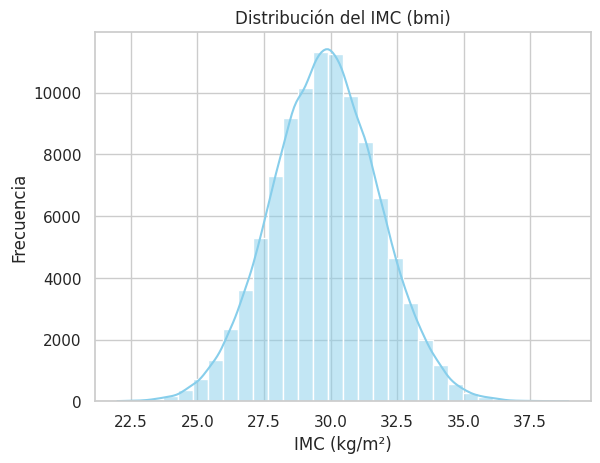

In [9]:
# Histograma: distribución de IMC (bmi)
sns.histplot(df['bmi'], bins=30, kde=True, color='skyblue')
plt.title("Distribución del IMC (bmi)")
plt.xlabel("IMC (kg/m²)")
plt.ylabel("Frecuencia")
plt.show()

/tmp/ipykernel_6366/2846715611.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='pastel')


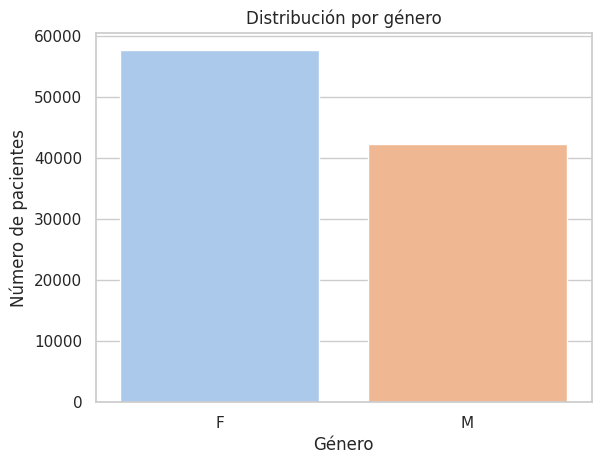

In [10]:
# Gráfico de barras: género
sns.countplot(x='gender', data=df, palette='pastel')
plt.title("Distribución por género")
plt.xlabel("Género")
plt.ylabel("Número de pacientes")
plt.show()

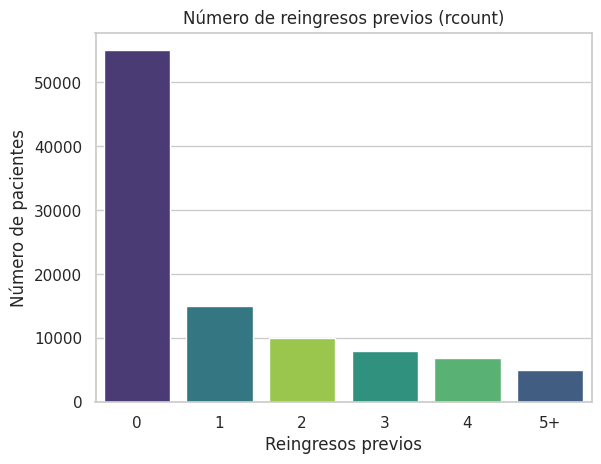

In [11]:
# Gráfico de barras: número de reingresos (rcount) ordenado
orden_rcount = ["0", "1", "2", "3", "4", "5+"]
sns.countplot(x='rcount', data=df, order=orden_rcount, hue='rcount', palette='viridis', legend=False)
plt.title("Número de reingresos previos (rcount)")
plt.xlabel("Reingresos previos")
plt.ylabel("Número de pacientes")
plt.show()

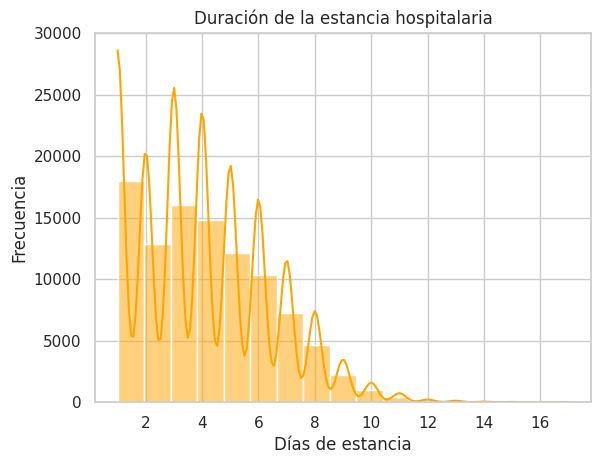

In [12]:
# Histograma: duración de la estancia hospitalaria
sns.histplot(df['lengthofstay'], bins=17, kde=True, color='orange')
plt.title("Duración de la estancia hospitalaria")
plt.xlabel("Días de estancia")
plt.ylabel("Frecuencia")
plt.show()

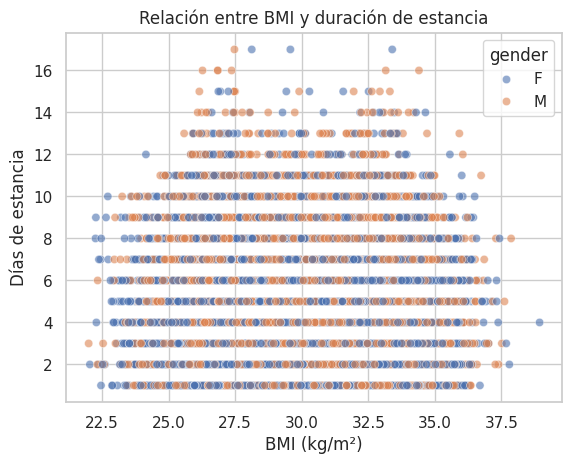

In [13]:
# Gráfico de dispersión: BMI vs duración de estancia
sns.scatterplot(x='bmi', y='lengthofstay', hue='gender', data=df, alpha=0.6)
plt.title("Relación entre BMI y duración de estancia")
plt.xlabel("BMI (kg/m²)")
plt.ylabel("Días de estancia")
plt.show()

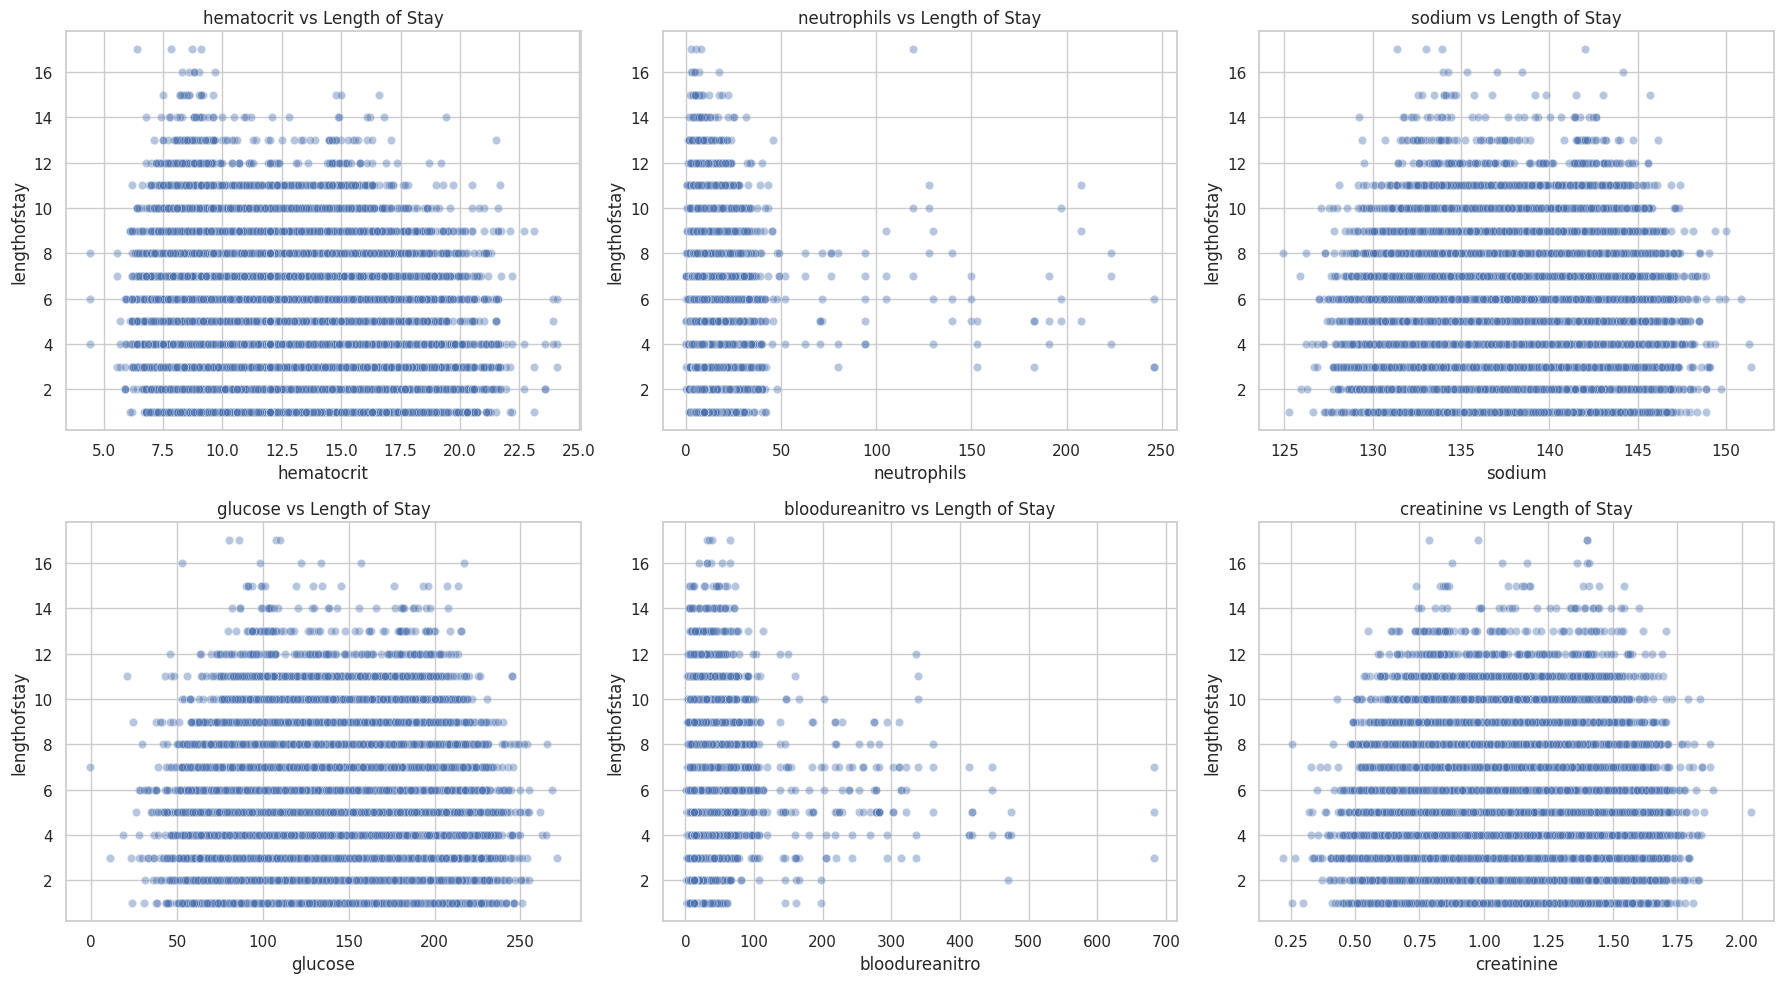

In [20]:
sangre_vars = ['hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine']

plt.figure(figsize=(18, 10))
for i, var in enumerate(sangre_vars, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[var], y=df['lengthofstay'], alpha=0.4)
    plt.xlabel(var)
    plt.ylabel('lengthofstay')
    plt.title(f'{var} vs Length of Stay')

plt.tight_layout()
plt.show()

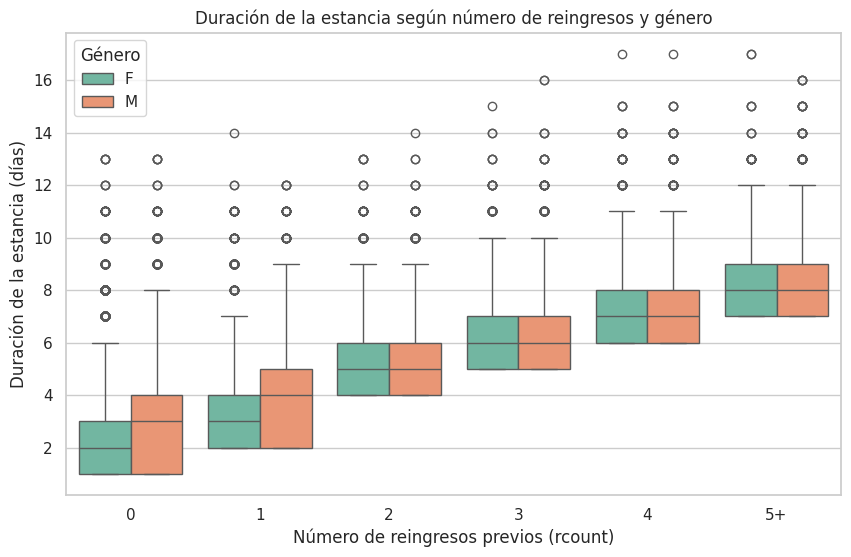

In [14]:
# Boxplot: duración de la estancia según número de reingresos y género
plt.figure(figsize=(10,6))
sns.boxplot(x='rcount', y='lengthofstay', order=orden_rcount, hue='gender', data=df, palette='Set2')
plt.title("Duración de la estancia según número de reingresos y género")
plt.xlabel("Número de reingresos previos (rcount)")
plt.ylabel("Duración de la estancia (días)")
plt.legend(title="Género")
plt.show()

/tmp/ipykernel_6366/2069416985.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_estancia_por_facid.index, y=media_estancia_por_facid.values, palette='mako')


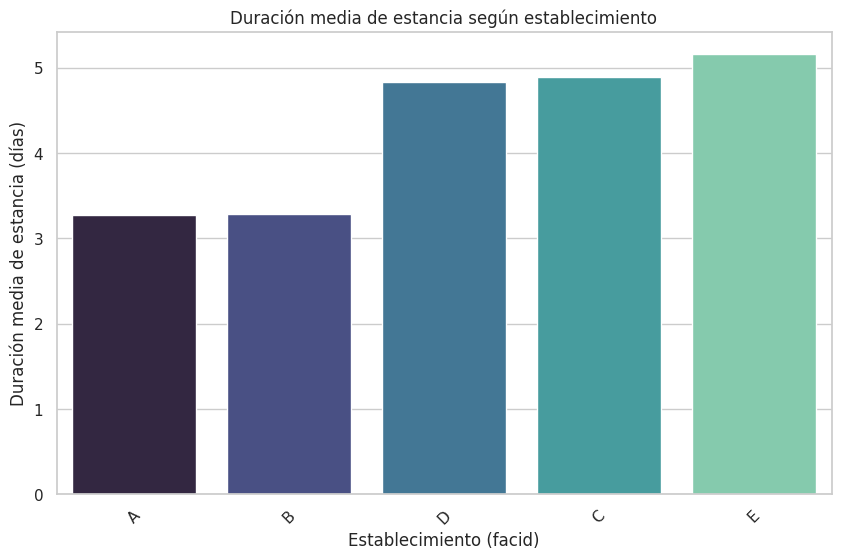

In [15]:
# Duración media de estancia por establecimiento
media_estancia_por_facid = df.groupby('facid')['lengthofstay'].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=media_estancia_por_facid.index, y=media_estancia_por_facid.values, palette='mako')
plt.title("Duración media de estancia según establecimiento")
plt.xlabel("Establecimiento (facid)")
plt.ylabel("Duración media de estancia (días)")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_6366/571811465.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='comorbilidades_sum', y='lengthofstay', data=df, palette='mako')


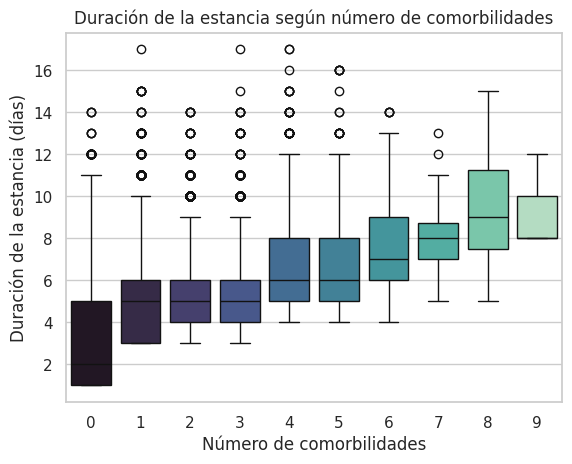

In [16]:
# Crear variable 'comorbilidades_sum' sumando todas las condiciones binarias
condiciones_binarias = [
    'dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence',
    'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother',
    'malnutrition', 'hemo'
]
df['comorbilidades_sum'] = df[condiciones_binarias].sum(axis=1)

# Boxplot: duración de la estancia según número de comorbilidades
sns.boxplot(x='comorbilidades_sum', y='lengthofstay', data=df, palette='mako')
plt.title("Duración de la estancia según número de comorbilidades")
plt.xlabel("Número de comorbilidades")
plt.ylabel("Duración de la estancia (días)")
plt.show()

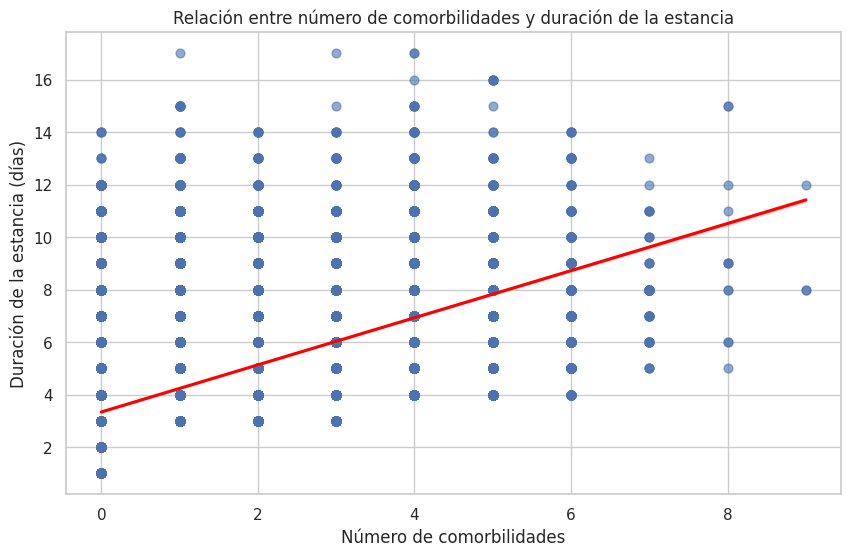

In [17]:
# Scatterplot + línea de regresión: comorbilidades vs duración de la estancia
plt.figure(figsize=(10,6))
sns.regplot(x='comorbilidades_sum', y='lengthofstay', data=df,
            scatter_kws={'s': 40, 'alpha': 0.6},
            line_kws={'color': 'red'})
plt.title('Relación entre número de comorbilidades y duración de la estancia')
plt.xlabel('Número de comorbilidades')
plt.ylabel('Duración de la estancia (días)')
plt.show()

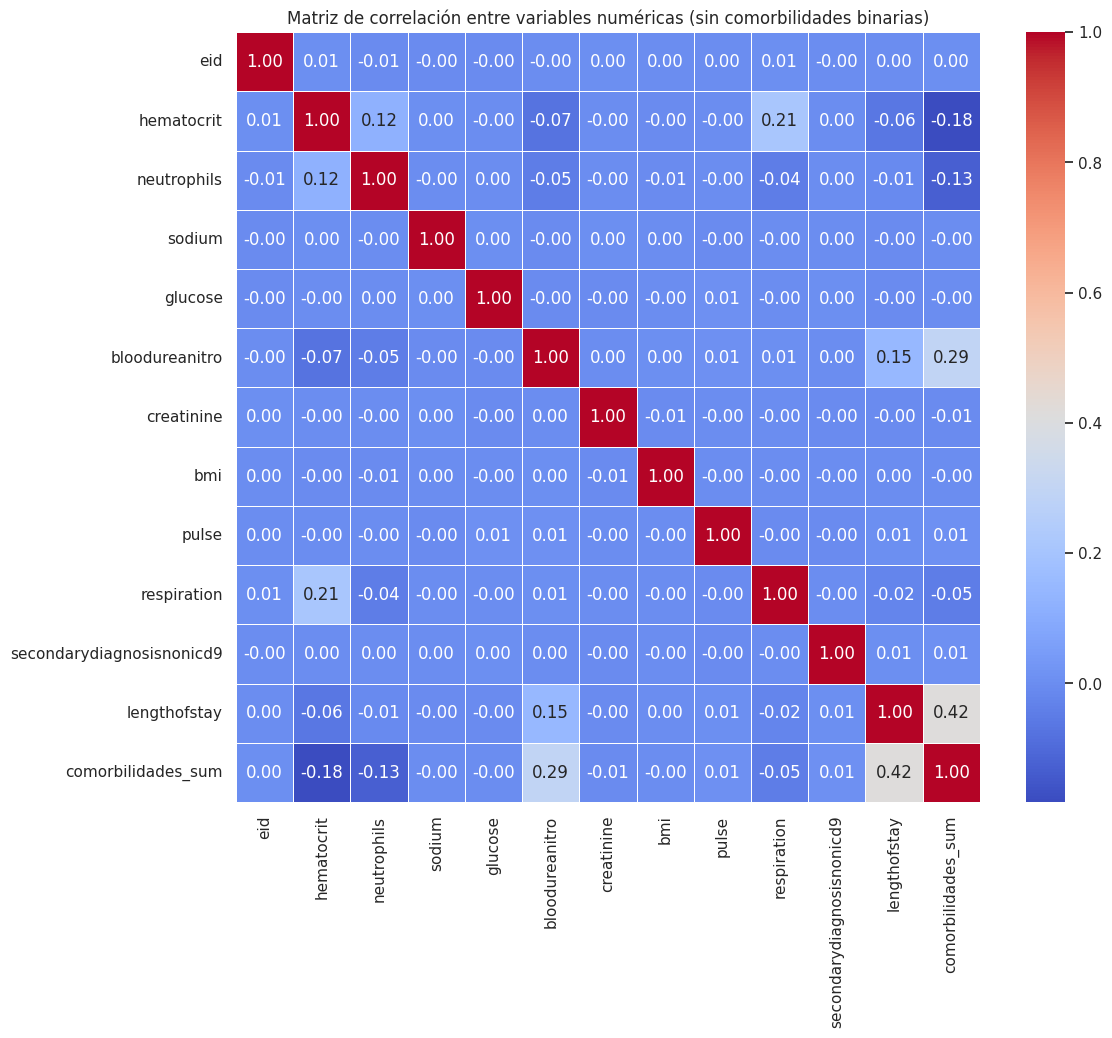

In [18]:
# Matriz de correlación solo con variables numéricas
dfcopy = df.drop(columns=condiciones_binarias)
numericas = dfcopy.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,10))
corr = numericas.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de correlación entre variables numéricas (sin comorbilidades binarias)")
plt.show()

/tmp/ipykernel_6366/1962511045.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bmi_categoria', y='lengthofstay', data=df, palette='pastel')


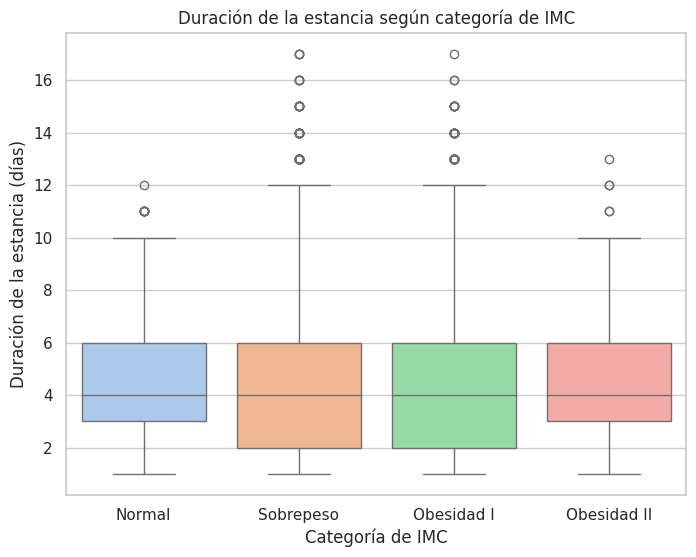

                 count      mean       std  min  25%  50%  75%   max
bmi_categoria                                                       
Normal           806.0  4.477667  2.391781  1.0  3.0  4.0  6.0  12.0
Sobrepeso      53152.0  3.984704  2.359668  1.0  2.0  4.0  6.0  17.0
Obesidad I     45561.0  4.005355  2.358194  1.0  2.0  4.0  6.0  17.0
Obesidad II      481.0  4.596674  2.422875  1.0  3.0  4.0  6.0  13.0


/tmp/ipykernel_6366/1962511045.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('bmi_categoria')['lengthofstay'].describe())


In [19]:
# Crear categorías de IMC adaptadas al rango de valores observados (20-40)
bins = [20, 25, 30, 35, 40]
labels = ['Normal', 'Sobrepeso', 'Obesidad I', 'Obesidad II']
df['bmi_categoria'] = pd.cut(df['bmi'], bins=bins, labels=labels, include_lowest=True)

# Boxplot: duración de la estancia según categoría de IMC
plt.figure(figsize=(8,6))
sns.boxplot(x='bmi_categoria', y='lengthofstay', data=df, palette='pastel')
plt.title("Duración de la estancia según categoría de IMC")
plt.xlabel("Categoría de IMC")
plt.ylabel("Duración de la estancia (días)")
plt.show()

# Estadísticas descriptivas por categoría de IMC
print(df.groupby('bmi_categoria')['lengthofstay'].describe())

- El número de comorbilidades muestra una relación lineal clara con la duración de la estancia hospitalaria: a mayor cantidad de comorbilidades, mayor es el tiempo de hospitalización.
- El establecimiento hospitalario también influye en la duración de la estancia, ya que algunos hospitales presentan medias de estancia más elevadas que otros.
- El número de reingresos previos (rcount) está asociado a una mayor duración de la estancia, especialmente en pacientes con múltiples reingresos.
- Por otro lado, el IMC (bmi) no parece estar relacionado con la duración de la estancia, ya que no se observa una tendencia clara en el gráfico correspondiente.
- Es probable que el IMC (bmi) no muestre una relación clara con la duración de la estancia hospitalaria porque su distribución es aproximadamente gaussiana. Hay una concentración de pacientes con valores cercanos a 30, mientras que hay pocos casos con IMC bajo (22) o alto (37). Esto limita la capacidad de observar una tendencia o relación significativa entre el IMC y la duración de la estancia.

# 5. Interpretaciones iniciales

### ¿Qué tendencias o patrones básicos se observan?

La población está distribuida de manera relativamente equilibrada entre géneros, con aproximadamente 57,000 mujeres y 43,000 hombres. El IMC presenta una distribución gaussiana, con la mayoría de los pacientes alrededor de un valor de 30. Se observa una tendencia clara: a mayor número de reingresos al hospital (rcount), mayor es la duración de la estancia hospitalaria. 

Del mismo modo, cuantos más comorbilidades tiene un paciente, más tiempo permanece hospitalizado, lo que sugiere una relación directa entre la complejidad clínica y la duración del ingreso. Además, la duración de la estancia varía según el establecimiento hospitalario, ya que algunos centros presentan medias de estancia más elevadas que otros. También se detectan algunos valores aberrantes en las variables clínicas, probablemente debidos a errores de medición.

### ¿Qué limitaciones tiene la base de datos?

Los parámetros sanguíneos no muestran correlación significativa con la duración de la estancia hospitalaria y la base de datos no incluye la edad de los pacientes, lo que limita el análisis clínico. 

La duración de la estancia varía según el establecimiento, posiblemente por sesgos de selección: algunos hospitales atienden casos menos graves y otros, patologías más complejas. Variables como la frecuencia cardíaca y la respiración tampoco presentan relación clara con la estancia. 

Además, la variable de reingresos (rcount) agrupa todos los casos de más de cinco reingresos, lo que dificulta el análisis detallado. 

Finalmente, se observan valores extremos en variables como bloodureanitro, respiration y neutrophils, probablemente debidos a errores de medición, que requieren una revisión adicional.

### ¿Qué hipótesis iniciales podrían plantearse para análisis posteriores?

- Un mayor número de comorbilidades está asociado a una mayor duración de la estancia hospitalaria.
- Los pacientes con más reingresos previos (rcount) tienden a permanecer más tiempo hospitalizados.
- El establecimiento hospitalario influye en la duración de la estancia, posiblemente por diferencias en la gestión o el tipo de pacientes atendidos.
- La depuración de valores extremos en variables clínicas podría revelar relaciones ocultas con la duración de la estancia.
- Podrían existir diferencias en la duración de la estancia según el género del paciente.

# 6. Conclusiones

El análisis inicial permitió identificar patrones relevantes en la duración de la estancia hospitalaria. Se observó una relación creciente entre el número de comorbilidades y los reingresos previos con el tiempo de hospitalización, lo que sugiere que la complejidad clínica y la recurrencia de ingresos son factores clave. Además, la duración de la estancia varía según el establecimiento hospitalario, posiblemente por diferencias en la gestión o el tipo de pacientes atendidos. El IMC, aunque distribuido de forma gaussiana, no mostró una relación clara con la estancia.

Las visualizaciones exploratorias facilitaron la identificación de estos patrones y la detección de valores extremos que requieren revisión adicional. Este entregable contribuye al desarrollo del proyecto al establecer las bases para futuros modelos predictivos y al resaltar la importancia de depurar y analizar cuidadosamente las variables clínicas y administrativas.


# 7. Referencias

- Fuente de los datos:  
  [Length of Stay (Microsoft) - Kaggle](https://www.kaggle.com/datasets/aayushchou/hospital-length-of-stay-dataset-microsoft)
- Documentación técnica y ejemplos de visualización:  
  [Seaborn tutorial](https://seaborn.pydata.org/index.html)